# A survey of the flowering plants of Biel/Bienne

In [1]:
# Final survey notebook for 2020-2021 plant surveys

# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

# create column of mutually exclusive plant characteristics from dataset
spdint1 = spd[spd["inv"]!="X"].copy()
spdint1["allstats"] = spdint1["inv"]
spdint2 = spd[spd["ns"]!="X"].copy()
spdint2["allstats"] = spdint2["ns"]
spdint3 = spd[spd["rch"]!="X"].copy()
spdint3["allstats"] = spdint3["rch"]
spdint4 = spd[spd["ni"]!="X"].copy()
spdint4["allstats"] = spdint4["ni"]
spdint5 = spd[spd["ongen"]!="X"].copy()
spdint5["allstats"] = spdint5["ongen"]
spd_allstats = pd.concat([spdint1, spdint2, spdint3, spdint4, spdint5])

# create yearly data for later charting use
spd1 = spd_allstats.loc[spd_allstats.year == 1].copy()
spd2 = spd_allstats.loc[(spd_allstats["year"] == 2)].copy()

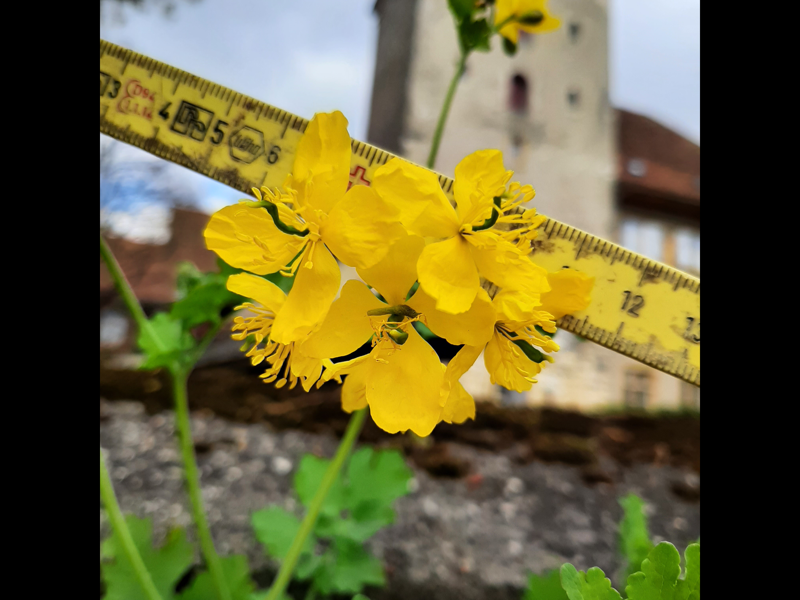

In [2]:
# generate banner image

this_picture = PILImage.open("resources/images/20210403_123904.jpg")
this_picture_r = this_picture.rotate(270)
output = io.BytesIO()
this_picture_r.thumbnail((800, 1200))

this_picture_r.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

*__Above :__ Chelidonum majus near the Chateau de Nidau, in the commune of Nidau just across the Thiel Canal from Biel/Bienne.*

## Background

This report continues in the tradition of amateur botanists contributing useful plant observation data with modern guidebooks and smartphone applications. The first survey period between June and September 2020 focused on the Suze river and its Madretschkanal variant in Biel/Bienne. The second set of surveys were conducted between February 2021 and September 2021 and included a wider geographical scope around the municipality of Biel/Bienne. The objective was to construct an initial dataset on the remnant flowering plant populations growing in different green spaces around the city of Biel/Bienne and perform some initial analysis to understand the floral composition of the municipality. Based on this initial analysis and the experience of conducting surveys in Biel/Bienne, further analysis will be conducted.

### Vascular Plants in Switzerland

A broad range of vascular plants have been under increasing threat fin Switzerland. In 2010, the IUCN Redlist report on the conservation status of Swiss vascular plants concluded that:

>Overall, every single RedList documents a manifest and sustained loss of species diversity at national level. Most threatened species appear to be bound for further losses – with no likelihood of this trend being reversed in the short term. In other words, the requirement enshrined in the Swiss Constitution that animal and plant species be prevented from going extinct has not been fulfilled.

In Switzerland the vascular plants that are most threatened, like with many other taxa, are aquatic or semi-aquatic {cite}`Bornand_2016`. Widespread modification of waterways, the spread of invasive species, agricultural run-off, development of shorelines and regulation of water levels has led to the decline of suitable habitats and thus some 70% of species are evaluated as threatened to some extent in the latest 2016 Redlist. Next come species associated with traditional forms of agriculture and land management that have largely disappeared over the past 100 years, namely species in low altitude prairies, ruderal areas, and cropland/vineyards, which range from 40% - 60% threatened (Ibid). The decline of these species follows directly from changing agricultural practices. The species of least concern are associated with alpine habitat, rockfalls, and other largely undisturbed habitat that have historically been relatively spared from encroachment - although for alpine habitats this is increasingly not the case as agriculture and development continue (Ibid). All of this is unfolding against the backdrop of accelerating climate change that researchers expect will provoke a major shift in habitat distributions and be a medium-term stress factor for a significant number of Switzerland's vascular plants {cite}`Vittoz_2013`.

Knowing that widespread local extinctions irreversibly harm the genetic base of plant populations and precede general extinctions, the *thousands of local extinctions* of sensitive and endangered species identified by researchers in 2020 is extremely alarming, to quote the researchers{cite}`Hicks_2020`:

> Our study presents clear evidence that current efforts to conserve threatened plant species are insufficient to achieve national and international targets (Convention on Biological Diversity (CBD), 2011; Swiss Biodiversity Strategy 2012) for maintaining biodiversity. The current paradigm of protecting and restoring threatened habitats is failing to avert extinctions. Going forward, we need to develop a comprehensive landscape approach, involving the creation of ecological infrastructure and translocation and assisted migration of threatened species into suitable habitats.

Despite experts having recognized the problem, communities have not yet done what is needed to 


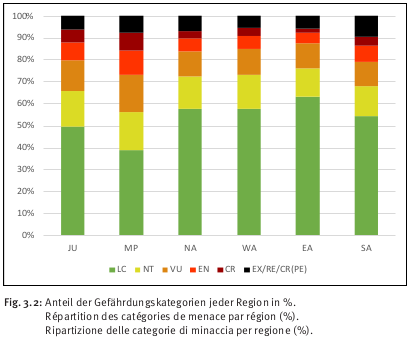

In [3]:
this_picture = PILImage.open("resources/images/redlist-species.png")
output = io.BytesIO()
this_picture.thumbnail((600,900))
this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

*__Above :__ This figure taken from Infoflora's 2019 Regional Redlist shows the regional differences in the threat facing vascular plants across Switzerland's biogeographical region. We see that the middle plateau / central plateau (MP) has the highest number of plants rated as higher than "LC", or least concern.*

### Central Plateau
The heart of Switzerland's population and economic output, the Central Plateau / Middle Plateau is also where these localized extinctions are most prominent. Some 60% of the vascular plant species evaluated for the IUCN's Redlist in the Central Plateau are classified as potentially or actually regionally threatened and the Jura region follows with 50% {cite}`Infoflora_2019`. Again, species associated with freshwater habitats are the group of most concern, with some 3/4 of species under potential threat. Around 60% of the alpine populations that survive throughout the plateau, are evaluated as under potential threat, as are just over half of lowland grassland species, and nearly half of forest species {cite}`Infoflora_2019`. Increased levels of output and consumption, as well as relatively intensive agricultural practices, are identified as the main drivers of risk for regional biodiversity. Not all of this is due directly to higher anthropogenic pressures: the central plateau hosts isolated, localized populations that are inherently more vulnerable to pressures on their populations (Ibid).

### Urban and suburban conservation

A judicious use of public spaces, such as road verges, railroad berms and parks, that balances their potential as habitats with the needs and requirements of the city's inhabitants can mitigate some anthropologic pressure. Allowing spaces to go un-mowed, sowing native wild-flower beds, and creating micro-habitats throughout urban and suburban areas can benefit both herbaceous and predatory insects {cite}`Sattler_2011`. In fact, (sub)urban green spaces and road verges can provide plants, insects, and birds with suitable conditions to pursue their life cycles and even become a "last refuge" for certain species (ibid). Further, the most recent data of nationwide biodiversity provided by the Biodiversity Monitoring System shows a significant decline in urban vascular plant species {cite}`FOEN_2020`. While private gardens clearly provide refuge for native species, research also shows that private gardens are heavily biased towards non-native plants, making public spaces even more important as a suitable refuge for remnant wild species. As such, improvement and maintenance of areas in and around urban centers could yield outsized results in terms of biodiversity preservation at this critical juncture for the future of ecosystem services.

There are a number of different strategies that municipalities can use.to boost wildflower diversity with different input costs and outcomes. For exmaple, two comparable strategies is the sowing of annual wildflowers (or planting and maintenance of perennials) versus simple reduced mowing frequencies timed to allow seed formation and deposition. The former requires greater input and management, but does this lead to greater resource provision for native insects compared to a reduced mowing regime ? Some reserach shows that plantations of annual and perennial wildflowers do not provide resources as continuously throughout the year as the remnant weed populations of the city and suggests that remnant and sown meadows support similar levels of pollinator diversity. In this case, increasing natural capital provision through reduced inputs should be a *low hanging fruit* for encouraginge natural capital provision in constructed areas.

## Survey locations

In the first year, the focus was primarily on the urban Suze river and its Madretschkanal variant in Biel/Bienne. Along this stretch of the river there are many varied habitats, ranging from deep shade to full pavement to flower strips maintained for ecological and aesthetic purposes. The sites are managed by the municipality to a greater or less degree and all areas surveyed were open access to the public and reasonably accessible for an average person. In 2021 the surveys included a wider geographic scope, but still focused on the Madretschkanal and the urban Suze river. The zones surveyed ranged from railroad berms to green areas in and around sidewalks and renaturalization sites. As such, the sites varied greatly in size and shape. 

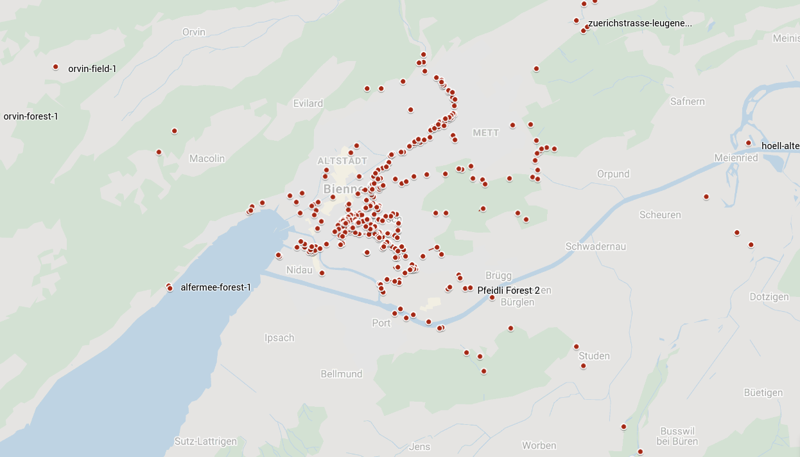

In [4]:
# generate mymaps image of year 1 and 2 survey sites in Biel/Bienne

this_picture = PILImage.open("resources/images/mymaps.png")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))

this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

*__Above :__ Map of survey locations around Biel/Bienne in 2020 - 2021. Note the heavy focus on the Suze river and the Madretschkanal branch, as well as the Madretch quarter of Biel/Bienne in particular.*

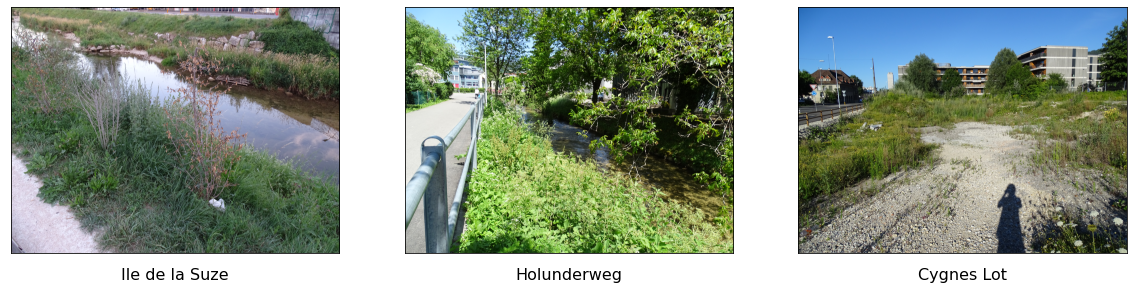

In [5]:
# generate images of survey sites

# read images
img_A = mpimg.imread('resources/images/DSC04657.JPG')
img_B = mpimg.imread('resources/images/suze-2.JPG')
img_C = mpimg.imread('resources/images/DSC02009.JPG')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include labels and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("Ile de la Suze", fontsize=16, labelpad=15)
ax[1].set_xlabel("Holunderweg", fontsize=16, labelpad=15)
ax[2].set_xlabel("Cygnes Lot", fontsize=16, labelpad=15)

plt.show()

*__Above :__ Images of three survey sites along the urban Suze river and the Madretschkanal. There was a great diversity in survey site characteristics amenable to many varieties of plants.*

The size of the sites was not recorded, but a detailed description of is available. In nearly all cases it is also possible to recover the boundary of the sites based on the geometry of the object as surveys were usually bounded by sidewalks, roads, or other barriers. Larger features, such as those in the photos above, were typically broken into smaller sites and surveyed individually to give some idea of the variation (or lack thereof) along a given feature. Sometimes the survey sites are small and isolated as in the features surveyed in Zukunftstrasse shown below on the right. While this data is not directly accessible in this analysis for the various survey sites, it can be reconstructed from the survey notes and the satellite imagery.

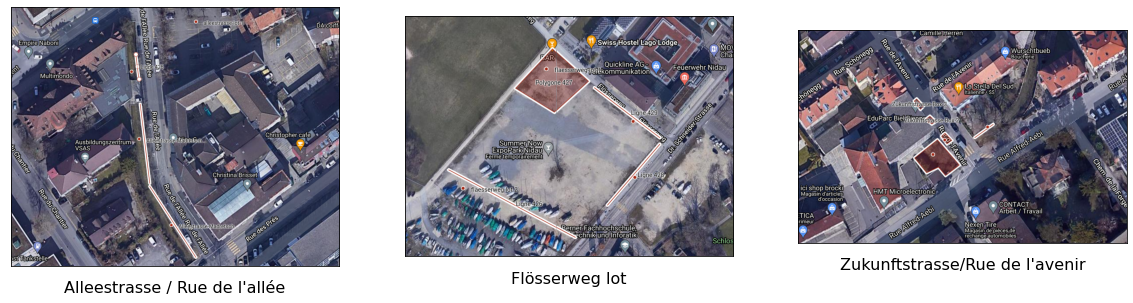

In [6]:
# plot the survey sites

# read images
img_A = mpimg.imread('resources/images/Selection_029.png')
img_B = mpimg.imread('resources/images/Selection_030.png')
img_C = mpimg.imread('resources/images/Selection_031.png')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include labels and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("Alleestrasse / Rue de l'allée", fontsize=16, labelpad=15)
ax[1].set_xlabel("Flösserweg lot", fontsize=16, labelpad=15)
ax[2].set_xlabel("Zukunftstrasse/Rue de l'avenir", fontsize=16, labelpad=15)

plt.show()

*__Above :__ Three examples of the decomposition of city features into survey sites. __Left :__ The concrete driveway and the bend in the Madretschkanal make natural separations in the three survey sites. __Middle :__ Shows the survey sites at the Flösserweg lot. It was surveyed three different times in four different locations. __Right :__ Two different feature types were surveyed at this location near Zukunftstrasse: Three raised garden beds put in by the city to slow street traffic, and two isolated river bank sites.*

## Methodology, survey period and data notes

A site was inspected for the vascular plants in flower, and all the different species identified were recorded. Throughout the survey period, only plants in flower were identified in order to increase the reliability of observations. The exceptions were some trial tree identifications, shrub identifications (such as the genus Nitida, Taraxacum), and *Hedera helix*, which is imminently recognizable and is common throughout survey locations. Most of these non-flower identifications are to the genus level only. Note that Poaceae and Juncacea (grasses and sedges) were left off the survey entirely due to the difficulty in identification. For all species, the subspecies were not recorded. The below algorithm was repeated for all flowering plants on a survey site:
* If a plant was known it was checked for the recognizable characteristics and immediately recorded
* If a flower was not known it was looked up in a plant identification application (Flora Incognita and/or PlantNet) and subsequently checked against the latest Flora Helvetica guidebook. If an identification was confident, it was recorded.
* If an identification was not clear even after these consultations, it was recorded to the genus level if possible, or left off of the observations.

Nearly all plants could be identified following this algorithm, which became increasingly efficient as time went on. In June 2020, the number of plants that could be reliably identified by the surveyor was small, whereas by August 2020, the surveyor could reliably identify the common species that dominate the landscape. This meant that the 2020 - 2021 observations are not directly comparable as the surveyor was able to record a significantly higher number of species during the second year. In addition, as the number of species that were recognizable without the need to consult an algorithm or a guidebook increased, the surveys became increasingly quick. Some direct results of this data collection protocol are the following:
* The year on year results cannot be directly compared as the surveyor was able to identify more plants in the second year
* If a plant was visible but it was not visited during its flowering time, it was very unlikely to be recorded on the survey
* There is no information about the relative densities of the plants within surveys.

It was decided to not use transects or gridsquares and avoid estimating the relatively proportion of different plant populations. As noted in the previous section, this is mitigaged by the strategy of taking multiple surveys across large urban features allowing some indication of the distribution to be oberved in the data. The geometry of the sites is easy to recover in the vast majority of cases using the surveyor's field notes and aerial photographs / satellite imagery.

In [7]:
# functions for chart creation

def make_a_summary_table(ax, data,colLabels, a_color="black", font_size=12, s_et_bottom_row=True):
    
    """Formats matplotlib table object.

    Args:
    ax: object: matplotlib table object
    data: array: the 2d array used to generate the table object
    cols_to_use: array: the list of column names
    a_color: str: matplotlib named color, face and edgecolor of table cells
    font_size: int: the font size for the table cells
    s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
    The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i in np.arange(len(colLabels))]
    bottom_row = [(len(data), i) for i in np.arange(len(colLabels))]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
        
    for a_cell in top_row:
        ax[a_cell].visible_edges = "B"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor("black")
        ax[a_cell].PAD = .2
        ax[a_cell].set_linewidth = 1
        ax[a_cell].set_height(.5 / (len(data)))

    for a_cell in data_rows:
        ax[a_cell].set_height(.5 / (len(data)))
        ax[a_cell].visible_edges = "BT"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor(banded_color)
        ax[a_cell]._text.set_horizontalalignment("center")
        ax[a_cell].set_linewidth = .1

    if s_et_bottom_row is True:
        
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = "B"
            ax[a_cell].set_edgecolor(line_color)
            ax[a_cell].set_linewidth = 1

    return ax



def a_simple_formatted_table(ax,data,colLabels=[], a_color="black", colWidths=[], bbox=[], **kwargs):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param colLabels: The labels for the data table columns
    :type colLabels: array
    :param a_color: The color of the cell borders
    :type a_color: str
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    a = ax.table(data,  colLabels=colLabels, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    t = make_a_summary_table(a, data, colLabels, a_color=a_color, font_size=12, s_et_bottom_row=False)
    return t


def a_stacked_bar_chart(ax, bars, xaxis=[], totals={}, palette={}, **kwargs):
    """Makes a stacked barchart given a matplotlib < ax > object
    and a dictionary of values for each "row" of the stack.
    
    :param ax: A matplotlib axes object
    :type ax: matplotlib.axes
    :param bars: Dictionary of values for each row
    :type bars: dict
    :param xaxis: The values that define the xaxis, can be
         date or categorical
    :type xaxis: array
    :param totals: A dictionary for a second non stacked bar chart.
    :type totals: dict
    :Return: A matplotlib axes object with a stacked barchart.    
    """
    # set the bottom of the stacked bar chart
    bottom = 0
    
    if totals:
        # this is a seperate independent stack
        # its value does not effect the value of <bottom>
        ax.bar(xaxis, totals["data"], bottom=bottom, label=totals["label"], zorder=0)
    else:
        pass
    
    for a_bar in bars:
        if palette:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, color=palette[a_bar], zorder=2)
        else:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, zorder=2)
        
        # add the value of data to bottom
        bottom += bars[a_bar]["data"]
    
    return ax

def a_single_column_table(ax,data, fs=12, colWidths=[.7, .3], bbox=[0,0,1,1], kwargs={}):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param fs: The font size for the cell data
    :type fs: float, int
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    
    
    a = ax.table(data, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    a.auto_set_font_size(False)
    a.set_fontsize(fs)

    return a

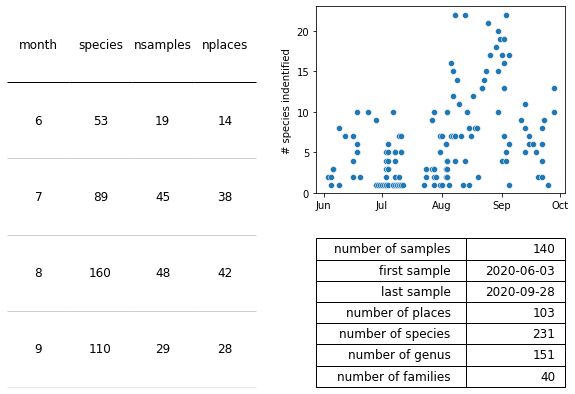

In [8]:
# axone monthly summary values
t_one = spd1.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd1.species.nunique()
speciesint = spd1["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd1.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd1.loc_date.nunique(),
    "first sample": spd1["date"].min().date(),
    "last sample":spd1["date"].max().date(),
    "number of places":spd1.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd1.genus.nunique(),
    "number of families":spd1.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Left :__ The number of unique species, unique samples, and unique sites surveyed per month in year 1. __Top right__: The number of species identified per survey per month in year 1. __Bottom right__: Summary statistics of year 1.*

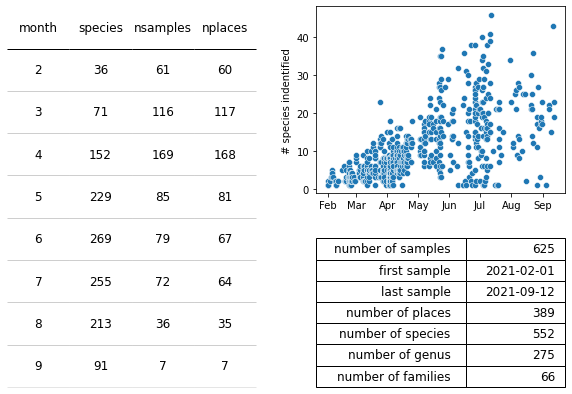

In [9]:
# axone monthly summary values
t_one = spd2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd2.species.nunique()
speciesint = spd2["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd2.loc_date.nunique(),
    "first sample": spd2["date"].min().date(),
    "last sample":spd2["date"].max().date(),
    "number of places":spd2.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd2.genus.nunique(),
    "number of families":spd2.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Above :__ Same chart as the previous but for year 2. Notice the survey period began in February rather than June and the significantly increased number of observations across all metrics.*

## Categorizing the species

This analysis follows the classifications of Infoflora. The first major distinction is between native and non-native plants: all species that arrived after 1500 (the discovery of America) are considered non-native / non indigenous. Since native species are evaluated under the IUCN Redlist, it was assumed that any species on the Redlist is a native species. Aside from the quite small category of "ns" (5 observations, or .08% of all species identified), which includes non-native but culturally valuable species (such as tulips that grow in humid meadows) and the few native species not included in the IUCN red list, all species fall into either (1) the native species with their conservation status characterized by an IUCN Redlist attribute or (2) non-native species characterized by their potential to become invasive. Throughout the survey period most species identified were native and classified as "Least Concern" according to the latest IUCN Redlist data. This is in line with what might be expected: the survey would likely identify populations of hardy, common plants resistant to anthropogenic pressures. As can be seen in the charts below, the general proportion of the categories remains the same between the different years and across months, with some variation as will be seen in the following sections.

*__Above :__ Some summary statistics for the first year of sampling. Note that the survey period went from June 2020 - August 2020. Note also the great increase in observations during the month of August compared to the other months.*

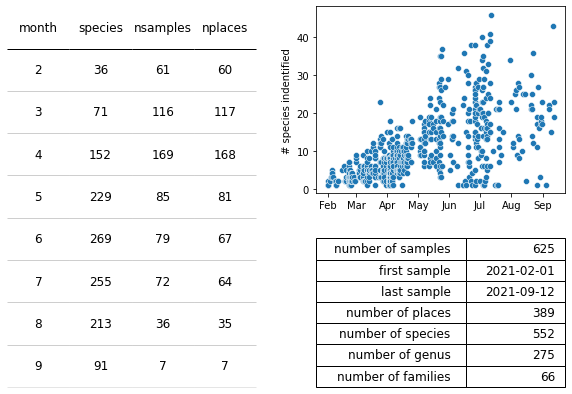

In [9]:
# axone monthly summary values
t_two = spd2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

# species count correction to account for some species name only being genus name (e.g. taraxacum sp.)
species1 = spd2.species.nunique()
speciesint = spd2["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_two.values
colLabels = [*t_two.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd2.loc_date.nunique(),
    "first sample": spd2["date"].min().date(),
    "last sample":spd2["date"].max().date(),
    "number of places":spd2.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd2.genus.nunique(),
    "number of families":spd2.fam.nunique()
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Top left:__ The number of unique species broken down per month and per classification category for 2020 surveys, __Top right:__ The number of unique species broken down per month and per classification survey for the 2021 surveys. __Bottom:__ The number of unique species identified per survey plotted monthly.*

### Non native, non-invasive

The vast majority of non-native plants are also not invasive and most have little to no chance of establishing spontaneous populations in the wild or in urban spaces. One example of a common non native, non-invasive plant, classified as *ni* in the chart below, is the annual *Conyza canadensis* (*Erigeron canadensis*) from North America that thrives in disturbed areas around the city. It was identified in 12 locations in August and September 2021, however these numbers underplay the relative amount of the plant in a given location as it spreads quickly and can dominate a given area during the late summer. Despite this dominance, the plant generally cedes its place to normal succession processes as time passes and thus is not considered invasive. Another two common examples of non native species that have succesfully naturalized without becoming invasive are *Onobrychis viciifolia*, common in fields and along road verges in late spring and early summer, and *Eupatorium cannabinum*, common along road verges and river banks. Both of these latter plants are available as "wild type" and are available in seed mixes for renaturalization and wildflower area creation.

In [10]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()





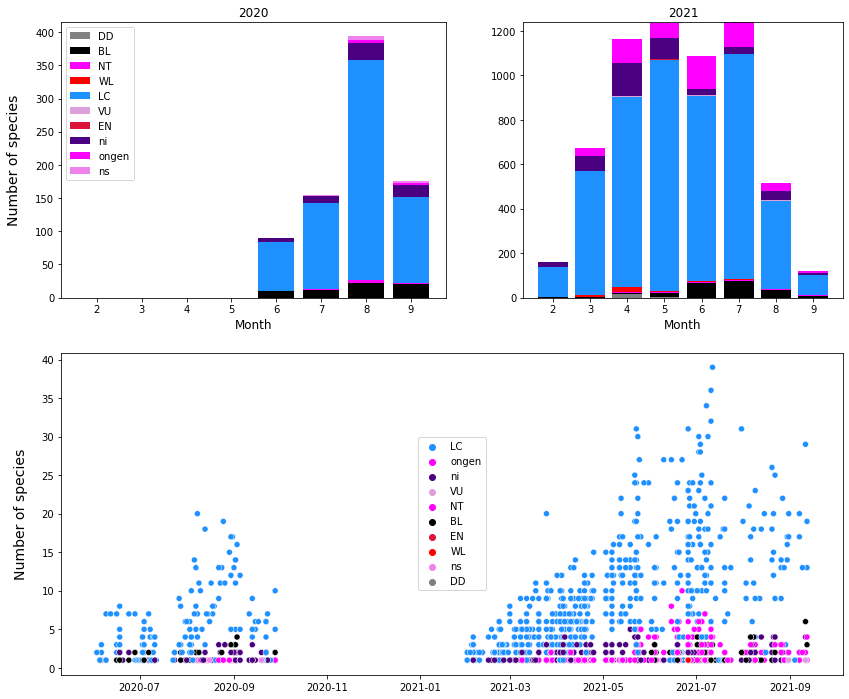

In [11]:
tick_spacing = 1

fig = plt.figure(figsize=(14,12))

gs = GridSpec(14,12)

axone = fig.add_subplot(gs[0:6, 0:6])
axtwo = fig.add_subplot(gs[0:6, 7:])
axthree = fig.add_subplot(gs[7:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=all_stat, x="date", y="data", hue="allstats", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(loc='center')

plt.show()   

*__Above :__ Three different common non-native, non-invasive plants that grow in different environments around Biel/Bienne.(Left to right) O. viciifolia is commonly found in blooms in fields, road and railroad berms in late spring; C. canadensis is an annual common in lots and highly disturbed areas; E. cannabinum thrives along river banks and in more humid areas and can bloom throught the late spring and summer.*

### Invasive species

Of all non-native species a small number are considered invasive. They must be able to reproduce in the wild and pose a threat to humans and local ecosystems. Usually for invasive plants this is through displacement of plant populations - the invasive species takes over a given area and native species have difficulty pushing it out. Info Flora maintains a list of the current watch list and black list species, a number of which were identified over the course of the survey. Some of them were purposefully planted, such as the rows of *Mahonia aquifolium* throughout Biel/Bienne's Madretsch quarter. Others have moved in of their own accord such as *Solidago canadensis* and *Erigeron Annuus*.

Invasive species in this study is defined as those species classified as either being on the *Watch List* (WL) or the *Black List* (BL) from the 2014 list compiled by Infoflora and the FOEN. Many more instaces of BL species were recorded than WL species throughout the course of the survey period, as can be seen in the below chart and tables. Te most important take away is that invasive species are driven by a few key species, namely *Erigeron annuus* (BL), *Solidago canadensis* (BL), *Senecio inaequidens* (BL), *Buddleja davidii* (BL) and *Mahonia Aquifolium* (WL), with *E. annuus* twice as common as its nearest competitor, *S. canadensis.* The most common WL species was *M. aquifolium* and is both very distinctive and had been widely planted by the municipality in preceeding decades.

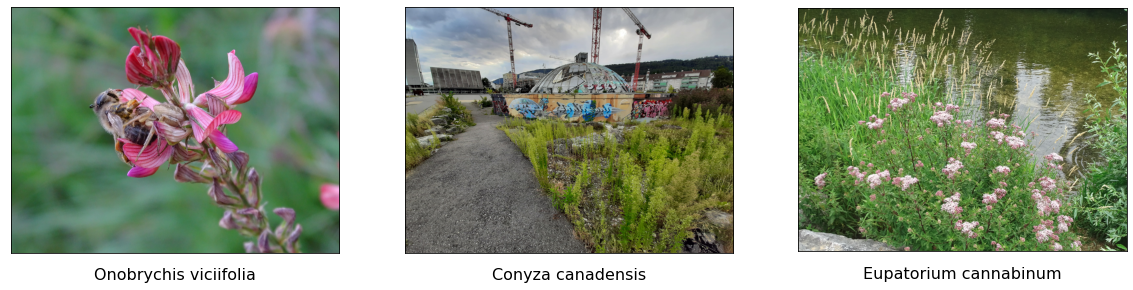

In [12]:
# generate images of non native, non invasive species

# read images
img_A = mpimg.imread('resources/images/intro-1.jpg')
img_B = mpimg.imread('resources/images/20210822_192453.jpg')
img_C = mpimg.imread('resources/images/Selection_028.png')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include labels and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("Onobrychis viciifolia", fontsize=16, labelpad=15)
ax[1].set_xlabel("Conyza canadensis", fontsize=16, labelpad=15)
ax[2].set_xlabel("Eupatorium cannabinum", fontsize=16, labelpad=15)

plt.show()

*__Above__ Three common invasive species in Biel/Bienne. S. canadensis and E. annuus spring up entirely spontaneously while M. aquifolium springs up spontaneously and was widely planted by the city.*

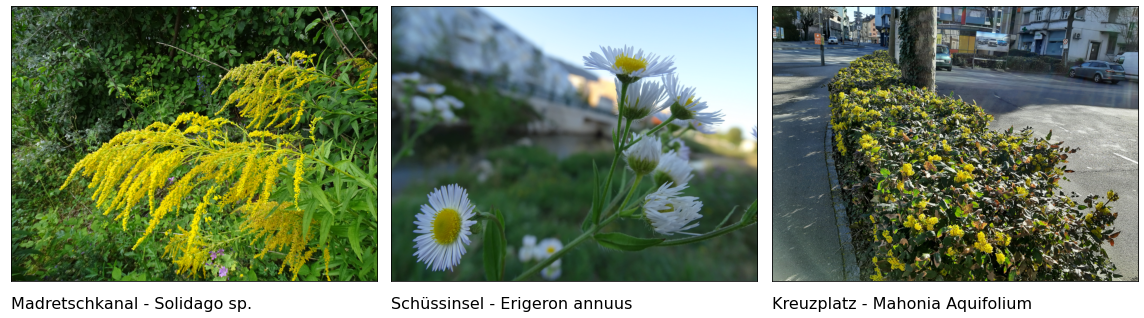

In [14]:
# Images for invasives

# read images
img_A = mpimg.imread('resources/images/DSC02758.JPG')
img_B = mpimg.imread('resources/images/iledelasuze2.JPG')
img_C = mpimg.imread('resources/images/20210404_093051.jpg')
img_C = ndimage.rotate(img_C,180)

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].set_xlabel("Madretschkanal - Solidago sp.", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Schüssinsel - Erigeron annuus", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Kreuzplatz - Mahonia Aquifolium", fontsize=16, loc='left', labelpad=15)
plt.tight_layout()
plt.show()

*__Above :__ Three common species of invasive plants found throughout the city. While all three of them spring up sontaneously, M. aquifolium was planted purposefully throughout the city and dominates some areas in Madretsch, such as Kreuzplatz.*

One interesting absence across all survey locations was *Reynoutra japonica*, a member of the Blacklist (BL). An aggressive invader of riverbanks and increasingly common throughout waterways in Switzerland, only one stand was identified near the Mettmoos park in Längholz. The following tables and charts summarize the BL and watchlist (WL) species identified over the course of the surveys. Note that Watchlist dynamics is driven by M. Aquifolium and BL dynamics are driven by a few species, but especially *E. Annuus*, followed by *Solidago canadensis* and *Senecio inaequidens.*

In [15]:
# Format these two tables
a = spd.loc[spd.inv == "BL"]
b = spd.loc[spd.inv == "WL"]
a.species.value_counts()

erigeron-annuus             138
solidago-canadensis          57
senecio-inaequidens          40
buddleja-davidii             25
robinia-pseudoacacia         11
prunus-laurocerasus           5
reynoutria-japonica           2
prunus-serotina               2
rubus-armeniacus              1
artemisia-verlotiorum         1
impatiens-glandulifera        1
heracleum-mantegazzianum      1
solidago-gigantea             1
Name: species, dtype: int64

In [16]:
b.species.value_counts()

mahonia-aquifolium        47
sedum-spurium              3
symphoricarpos-albus       2
parthenocissus-inserta     2
Name: species, dtype: int64

*__Above:__ The above tables of the Black List and Watch List species demonstrate that the overall abundance of invasive species in the survey locations was driven by a few key species.*

*__Top left :__ Number of invasive species identified per month in year 1. __Top right :__ Number of invasive species identified per month in year 2. __Bottom :__ Number of unique invasive species identified per survey for both years.*

In most cases either no invasives or only one invasive species was found in each survey. This is constant across months and across years. Since only a handful of invasives are driving these numbres, it is clear to that the higher numbers of invasive species identified in June, July, August and September corresponds to the flowering season of *E. Annuus*, *S. canadensis* and *S. inaequidens*

In [18]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()




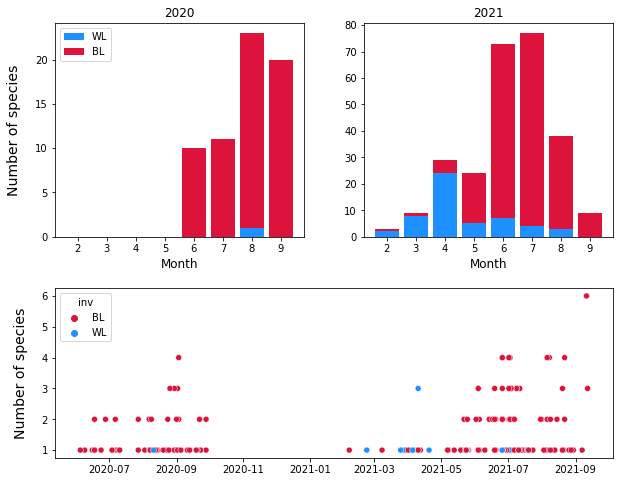

In [19]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["inv"]
not_these = ["X","-"]

period = "month"
column = "inv"

biogeo = "mp"

a_palette = {
    "WL":"dodgerblue",
    "BL":"crimson",
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

inv_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

inv_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_ytwo_bars)
    

# rmp status per survey
inv_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).inv.value_counts()).rename(columns={column:"data"}).reset_index()



tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, inv_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, inv_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=inv_stat, x="date", y="data", hue="inv", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

plt.show()   

### Redlist and priority list species on the middle plateau

The IUCN Red List is an internationally comparable ranking of the conservation status of individual species and biotopes. Infoflora worked with the IUCN to create a national redlist for Switzerland, last updated in 2016. This analysis was complemented in 2019 with the publishing of regional redlist report. This regional redlist data provided a IUCN redlist rating for each native species in each of Switzerland's main biogeographical regions. In the previous analysis of redlist species, the national rating was used as around 500 observations in the Jura and Northern Alps were included in the surveys. As Biel/Bienne is located on the middle plateau, this section uses only observations made within the middle plateau region and categorizes them according to this regional redlist analysis. This is still the vast majority of survey locations and species identified - about 7000 observations total.

In [ ]:
# Images for invasives

# read images
img_A = mpimg.imread('resources/images/dipsacus-pilosela.JPG')
img_B = mpimg.imread('resources/images/20210404_154240.jpg')
img_C = mpimg.imread('resources/images/epilobium-dodonaei.JPG')
img_B = ndimage.rotate(img_B,180)

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].set_xlabel("Schüessinsel - Dispacus pilosus", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Portplatz - Anemone nemorosa", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Suze, Bürenstrasse - Epilobium dodonaei", fontsize=16, loc='left', labelpad=15)
plt.tight_layout()
plt.show()

*__Above :__ Some examples of native species found throughout Biel/Bienne. From left to right: D. Pilosella, Anemone nemorosa, Epilobium dodonaei*

As noted in the introduction, the regional redlist for the central plateau ranks many species on a higher risk classification than the national redlist as many populations are under more threat on the central plateau than in other biogeographic regions. While species in each category were identified, the vast majority of native species were of least concern. Compared to using the national redlist ranking, the overall results do not change, with only a few species moving from Least Concern to Near Threatened.

In [ ]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["rch","ni", "inv", "ongen"]
not_these = ["X","-"]

period = "month"
column = "rmp"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
}
    
    
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
rmp_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).rmp.value_counts()).rename(columns={column:"data"}).reset_index()



tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"


axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
axone.legend()
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=rmp_stat, x="date", y="data", hue="rmp", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

plt.show()   

*__Above:__ Most species identified were of "Least Concern" (LC).* 

## Conclusions and Discussion

To put the observations in context, according to Infoflora, 1207 different vascular plant species were identified in the 100 square kilometers roughly centered on Biel/Bienne. Of these species, some 750 were not identified on the plant surveys and about 100 species were identified in the surveys but not included in Infoflora's list of observations. While a great part of this mismatch is due to the surveyor not identifying most trees and grasses, it also indicates a significant floral diversity in the region that was not identified in the surveys. It also indicates that Infoflora may be underestimating the diversity of plant species in urban spaces, even if this diversity comes from commercial seeds and non-native plants.

Some general conclusions that can be drawn from the data are the following:
* While invasive speces are widespread, they do not dominate the landscape and are characterized by a few key species
* Some threatened and near threatened species are able to survive in the urban landscape
* Non-indigenous species form a critical part of the vegetation of the city

Plant surveys need to be done systematically and year on year as weather and other random factors significantly affect the population distributions of vascular plant species. The first survey year, 2020, coincided with the warmest year on record in Switzerland, tied with 2018, with a scarcity of rainfall. Meanwhile, 2021 saw the wettest and coldest spring and summer weather for many local records. It is thus to be expected that these extreme variations would result in different plant species being identified across Biel/Bienne as a whole and even in certain survey locations. One anecdote of this is a regionally Near Threatened species, *Dipsacus pilosus*, which was identified near the Ile de la Suze on the banks of the Suze river in 2020, however in 2021 the site was submerged for much of the survey period due to the extra rainfall and there was no sign of its presence. While this sort of data can begin to be teased out by comparing the roughly 50 sites that overlap between 2020 and 21, the overall year on year analysis should wait until the 2022 data can be gathered.

The microlevel nature of these surveys allows for a neighborhood by neighborhood and block by block analysis of plant resources in the city. Similarly, features such as road verges, rail road berms, and parks can be compared across the city. Some of this analysis will be done in a separate notebook for the 2021 data using some features already keyed to the observations. In addition, there are clear and direct extensions thanks to rich sources of data available from municipal authorities that could allow explanatory causes to be determined and differentiated site treatments to be evaluated. One example that will be addressed is that ProNature grazes sheep on select railroad berms - are there differentiated levels of diversity in these locations compared to surrounding non-treated sites? The additional data that should be explored is the following:
* The municipal registry of trees available from the city of Biel/Bienne
* A more detailed list of Infoflora observations down to the kilometer level, or the user-entered coordinates.
* Classification of the each site according to level 3 - 4 of TypoCh from *Lebensräume der Schweiz*
* Further inclusion of trees, shrubs, sedges and grasses, as feasible

In short, there are a number of interesting extensions to this analysis, some of which are possible with the available data and some of which will require integration with other datasets or collection of additional data. Plant surveys will begin anew in mid February 2022. Due to the surveyor's experience, it is expected to match or exceed the observations made in 2021, which will provide a strong year on year data set of species make-up in different locations.

## Year three 2022

The surveys will be repeated in year 3. Given the surveyor's additional experience with the subject matter, it is expected to collect significantly more observations and to continue to improve accuracy, efficiency, and geographic coverage. This increased data will also be relatively easier thanks to experience working with the data and having prewritten useful code for its analysis and visualization.

### Objectives
The objective of year three is to build the predictive capacity of the data set to answer the following questions: Given the list of vascular plant species that occur in this area and this set of environmental data, what can I predict about the supported biodiversity ? What areas are most important for target species (bees/butterflies) throughout the year ?

This will require collecting plant occurence data on a wide array of habitats throughout the year and integrating this data into a format compatible for analysis with satellite and GIS data from the municipalaity. In additon 

### Survey period and locations
Surveys will be conducted from February through September 2022. This is to capture the early and late blooming flowers that are especially important for hibernating insect species. Ideally each location will be surveyed on a bi-monthly basis to capture the seasonality of the flowering populations, but this will likely not be a possible schedule to maintain for all observation. Thus, a core group of locations will receive this treatment, while other locations will be surveyed opportunistically with the aim of establishing a solid coverage of the municipality of Biel/Bienne. The surveys will again be focused on Biel and the immediate surrounding periurban region. The same locations will be surveyed as in 2021 with some geographic expansion.

### Tools and methodology
The surveys will be conducted using the infoflora app on an android smartphone (Samsung A51). Surveys will again be focused on identification of species and not an estimation of ground cover or dominance. The following differences will be registered:
* The InfoFlora app will be used for all surveys.
* A picture will be saved for as many observations as feasible. 
* The survey location methodology will be modified (see above)
* Plants will be recorded as soon as a reliable observation can be made, without necessarily waiting for the species to flower. This will affect primarily observations of "evergreens" which will be recorded early in the year.

### Additional data
A major focus of year three is the compatibility of this data set with the needs of the municipal, cantonal and federal managers of green spaces and biodiversity. As such, a more active approach to the integration of data from Infoflora, the municipality of Biel/Bienna and surrounding communes. In addition, in order to investigate the results of interventions that have taken place over the years, data will be sought out on renaturalization projects to attempt to identify outcomes.

## About the surveyor
Currently enrolled as a master student at the Oeschger Center for Climate Change Research at the Universität Bern, these surveys will serve as the foundation for my thesis work on (sub)urban plant populations in times of significant climate change. Previously trained as an economist these surveys have also been an avenue to quickly developy my knowledge of the local flora, culminating in receiving the first-level accreditation, *Bellis* certificate, from the Swiss Botanical Society in 2021.

## Contact me
Qustions ? Comments ? Feedback most welcome at thor.erismann @ gmail.com